# 1.Loading the files  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

# List of file paths for the Excel files
file_paths = ["Youtube01-Psy.csv", "Youtube02-KatyPerry.csv", "Youtube03-LMFAO.csv", "Youtube04-Eminem.csv", "Youtube05-Shakira.csv"]

# Create an empty list to store the DataFrames
dfs = []

# Iterate over the file paths and read each Excel file into a DataFrame
for file_path in file_paths:
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenate the DataFrames into a single DataFrame
combined_df = pd.concat(dfs)
combined_df = combined_df.reset_index()
combined_df= combined_df.drop(["index"], axis =1)
print()
# Print the combined DataFrame
output_file = "combined_file.xlsx"
combined_df.to_excel(output_file, index= False)

print("Combined DataFrame saved as", output_file)


Combined DataFrame saved as combined_file.xlsx


In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

In [3]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\siyeonkim\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [4]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\siyeonkim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\siyeonkim\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\siyeonkim\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# 2. EDA

## Text Analysis & Preproccessing


In [5]:
def preprocess_text(text):
    
    #Replace url with the world "url"
    url= r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    text = re.sub(url,'web',text)
    
    # Replace email addresses with the word "email"
    email_pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}\b'
    text = re.sub(email_pattern, 'email', text)
  
    #Replace numbers to "num"
    number = r'\d+(\.\d+)?' 
    text = re.sub(number,'num',text)
    
    #Remove special characters 
    character = r'[^\w\s]'
    text = re.sub(character,'',text)
    
    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove punctuation
    tokens = [token for token in tokens if token not in string.punctuation]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.lower() not in stop_words]

    # Perform lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join the tokens back into a single string
    tokens = ' '.join(tokens)

    # Return the preprocessed text as a string
    return tokens

In [6]:
combined_df['preprocessed_text_r_l'] = combined_df['CONTENT'].apply(preprocess_text)
print(combined_df['preprocessed_text_r_l'].head(10))

0         Huh anyway check youtube channel kobyoshinum
1    Hey guy check new channel first vid US MONKEYS...
2                                   test say murdevcom
3                        shaking sexy as channel enjoy
4                              watchvvtaRGgvGtWQ Check
5    Hey check new website site kid stuff kidsmedia...
6                                    Subscribe channel
7              turned mute soon came wanted check view
8                           check channel Funny VIDEOS
9                    u shouldd check channel tell next
Name: preprocessed_text_r_l, dtype: object


## Feature Extraction from Text

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

shuffled_df = shuffle(combined_df)

X = shuffled_df['preprocessed_text_r_l']
y = shuffled_df['CLASS']

class_counts = y.value_counts()
print("Class Counts:")
print(class_counts)

Class Counts:
1    1005
0     951
Name: CLASS, dtype: int64


Class Counts:
1    1005
0     951
Name: CLASS, dtype: int64


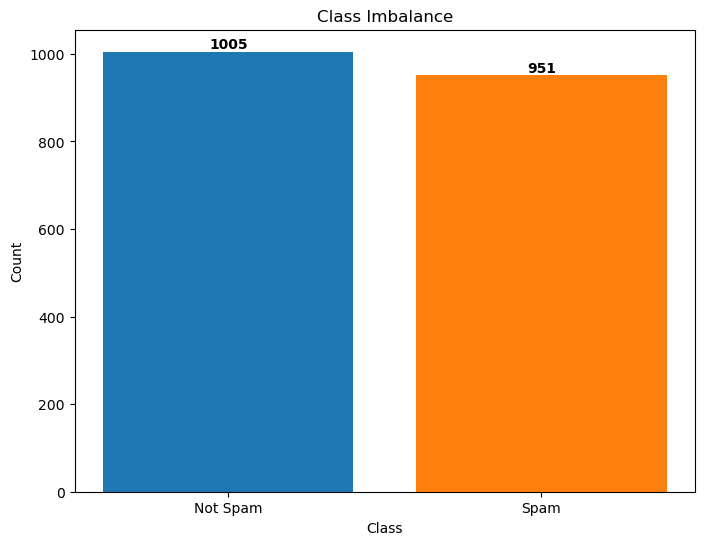

In [39]:
import matplotlib.pyplot as plt

class_counts = y.value_counts()
print("Class Counts:")
print(class_counts)


class_labels = ['Not Spam', 'Spam']
class_values = class_counts.values


colors = ['#1f77b4', '#ff7f0e']

plt.figure(figsize=(8, 6))
plt.bar(class_labels, class_values, color=colors)


for i, v in enumerate(class_values):
    plt.text(i, v, str(v), ha='center', va='bottom', fontweight='bold')

plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Imbalance")
plt.show()

In [60]:
#tfidf
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(combined_df['preprocessed_text_r_l'])
y = combined_df['CLASS']

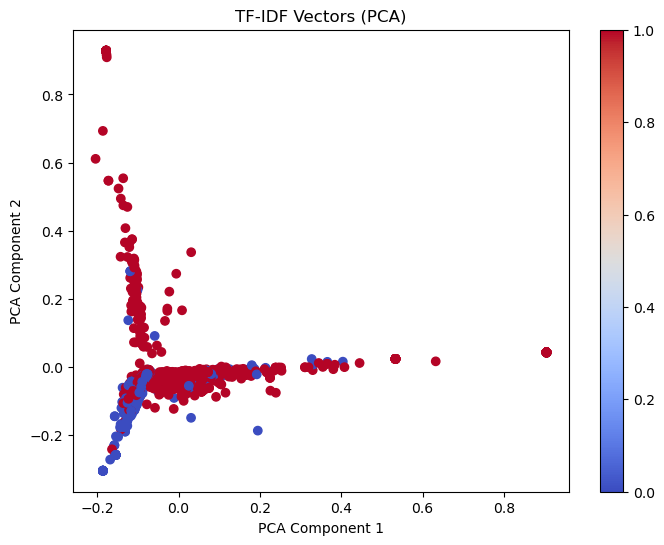

In [61]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Perform dimensionality reduction using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Create a scatter plot of the TF-IDF vectors
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("TF-IDF Vectors (PCA)")
plt.colorbar()
plt.show()

In [62]:
!pip install wordcloud

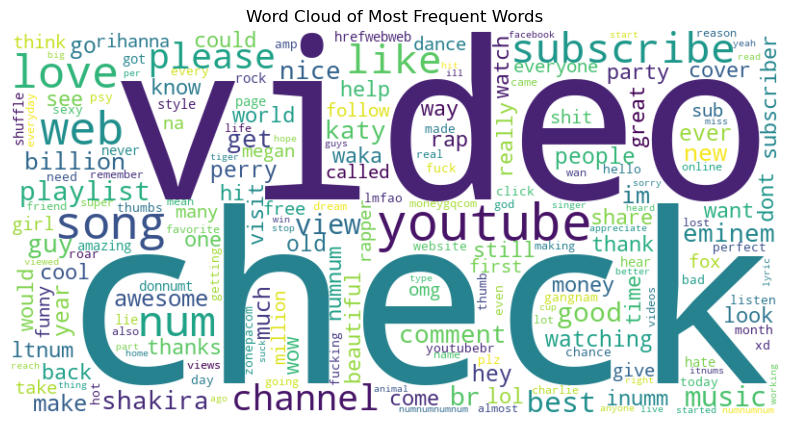

In [63]:
from wordcloud import WordCloud

words = vectorizer.get_feature_names_out()

word_frequencies = dict(zip(words, X.toarray().sum(axis=0)))

wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_frequencies)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Most Frequent Words")
plt.show()

# 4. Training & Modelling

In [8]:
#spliting training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Accuracy

In [9]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("LogisticRegression Testing Accuracy:", accuracy_lr)

#Support Vector Machines
from sklearn.svm import SVC
model_svc = SVC()
model_svc.fit(X_train, y_train)
y_pred_svm = model_svc.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svm)
print("SVC Testing Accuracy:", accuracy_svc)

#Random Forest
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("RandomForest Testing Accuracy:", accuracy_rf)

#Knn
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Testing Accuracy:", accuracy_knn)


LogisticRegression Testing Accuracy: 0.9311224489795918
SVC Testing Accuracy: 0.9311224489795918
RandomForest Testing Accuracy: 0.9413265306122449
KNN Testing Accuracy: 0.6326530612244898


## Precision, Recall, F1-score

In [11]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Logistic Regression
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')

print("Logistic Regression Precision:", precision_lr)
print("Logistic Regression Recall:", recall_lr)
print("Logistic Regression F1-score:", f1_lr)

# Support Vector Machines
precision_svc = precision_score(y_test, y_pred_svm, average='weighted')
recall_svc = recall_score(y_test, y_pred_svm, average='weighted')
f1_svc = f1_score(y_test, y_pred_svm, average='weighted')

print("Support Vector Machines Precision:", precision_svc)
print("Support Vector Machines Recall:", recall_svc)
print("Support Vector Machines F1-score:", f1_svc)

# Random Forest
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print("Random Forest Precision:", precision_rf)
print("Random Forest Recall:", recall_rf)
print("Random Forest F1-score:", f1_rf)

# KNN
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

print("KNN Precision:", precision_knn)
print("KNN Recall:", recall_knn)
print("KNN F1-score:", f1_knn)

Logistic Regression Precision: 0.9368247416108185
Logistic Regression Recall: 0.9311224489795918
Logistic Regression F1-score: 0.9313017158097069
Support Vector Machines Precision: 0.9368247416108185
Support Vector Machines Recall: 0.9311224489795918
Support Vector Machines F1-score: 0.9313017158097069
Random Forest Precision: 0.9430562468889995
Random Forest Recall: 0.9413265306122449
Random Forest F1-score: 0.9414490045640368
KNN Precision: 0.7906541504924254
KNN Recall: 0.6326530612244898
KNN F1-score: 0.5955132241365064


In [10]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test, y_pred_lr)
print("LogisticRegression Confusion Matrix:")
print(cm_lr)

cm_svc = confusion_matrix(y_test, y_pred_svm)
print("SVC Confusion Matrix:")
print(cm_svc)

cm_rf = confusion_matrix(y_test, y_pred_rf)
print("RandomForest Confusion Matrix:")
print(cm_rf)

cm_knn = confusion_matrix(y_test, y_pred_knn)
print("KNN Confusion Matrix:")
print(cm_knn)

LogisticRegression Confusion Matrix:
[[173   3]
 [ 24 192]]
SVC Confusion Matrix:
[[173   3]
 [ 24 192]]
RandomForest Confusion Matrix:
[[170   6]
 [ 17 199]]
KNN Confusion Matrix:
[[175   1]
 [143  73]]


# Visualise Model

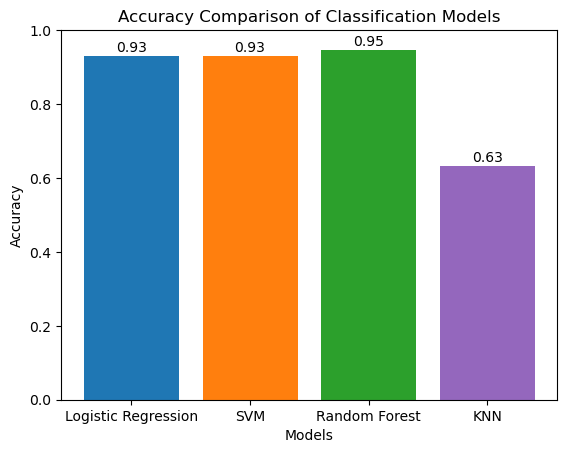

In [22]:
# Accuracy values
accuracies = [accuracy_lr, accuracy_svc, accuracy_rf, accuracy_knn]

# Model names
model_names = ['Logistic Regression', 'SVM', 'Random Forest', 'KNN']

# Color for each bar
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd']

# Create bar plot
plt.bar(model_names, accuracies, color=colors)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Classification Models')
plt.ylim([0.0, 1.0])  # Set the y-axis limits between 0 and 1

# Add numbers on top of each bar
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, str(round(v, 2)), ha='center')

# Save the plot as a file
plt.savefig('accuracy_plot.png')

# Show the plot
plt.show()

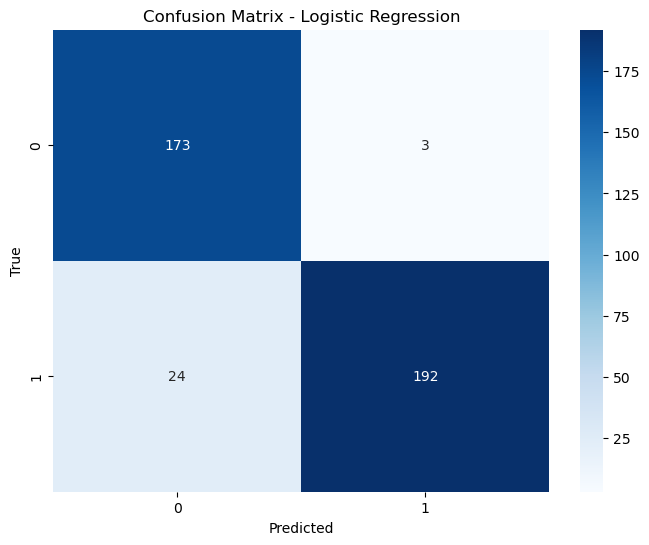

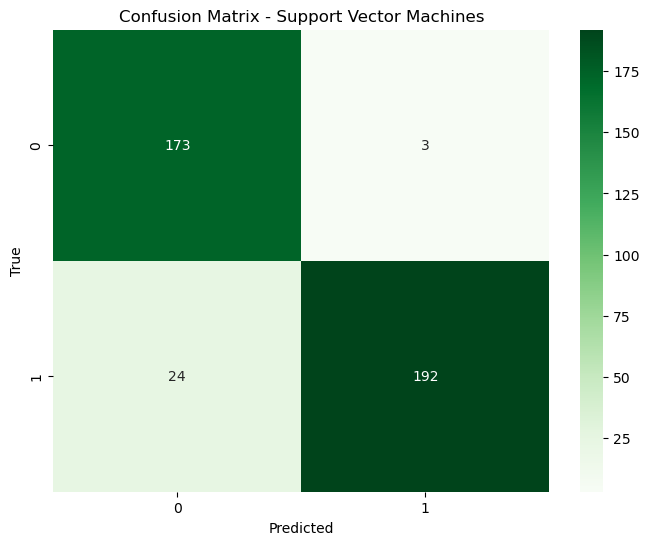

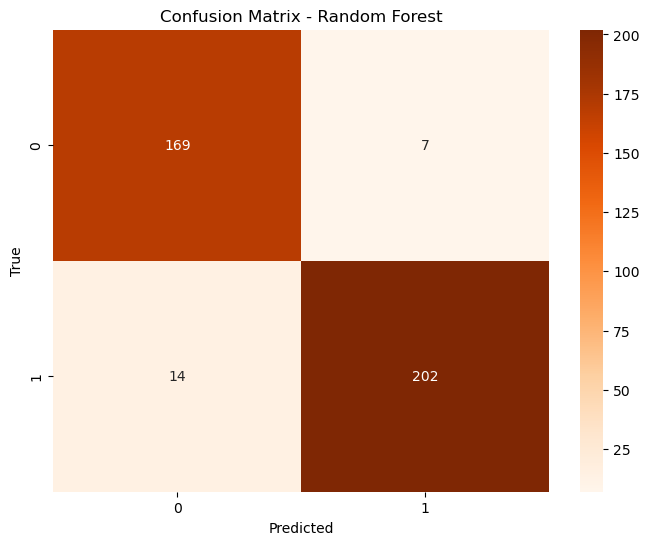

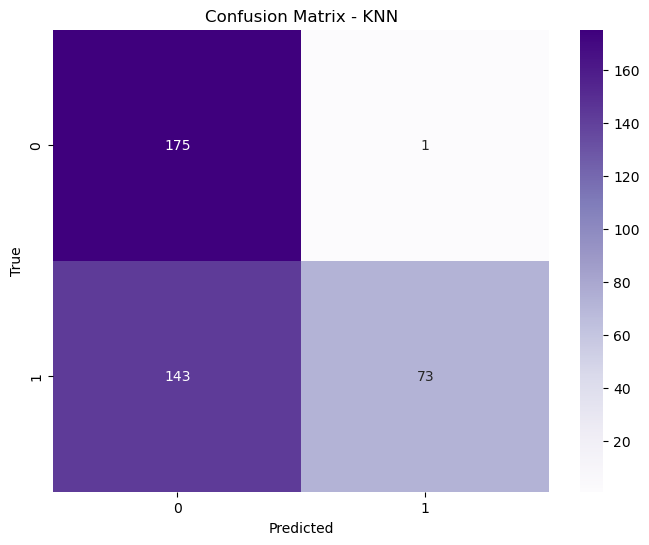

In [26]:
# Confusion matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Confusion matrix for Support Vector Machines
cm_svc = confusion_matrix(y_test, y_pred_svm)

# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Confusion matrix for KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Function to plot confusion matrix with different colormap
def plot_confusion_matrix(cm, title, cmap):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)

# Plot confusion matrix for Logistic Regression with "Blues" colormap
plot_confusion_matrix(cm_lr, 'Confusion Matrix - Logistic Regression', cmap='Blues')
plt.show()

# Plot confusion matrix for Support Vector Machines with "Greens" colormap
plot_confusion_matrix(cm_svc, 'Confusion Matrix - Support Vector Machines', cmap='Greens')
plt.savefig('cm_svm.png')
plt.show()

# Plot confusion matrix for Random Forest with "Oranges" colormap
plot_confusion_matrix(cm_rf, 'Confusion Matrix - Random Forest', cmap='Oranges')
plt.savefig('cm_rf.png')
plt.show()

# Plot confusion matrix for KNN with "Purples" colormap
plot_confusion_matrix(cm_knn, 'Confusion Matrix - KNN', cmap='Purples')
plt.savefig('cm_knn.png')
plt.show()

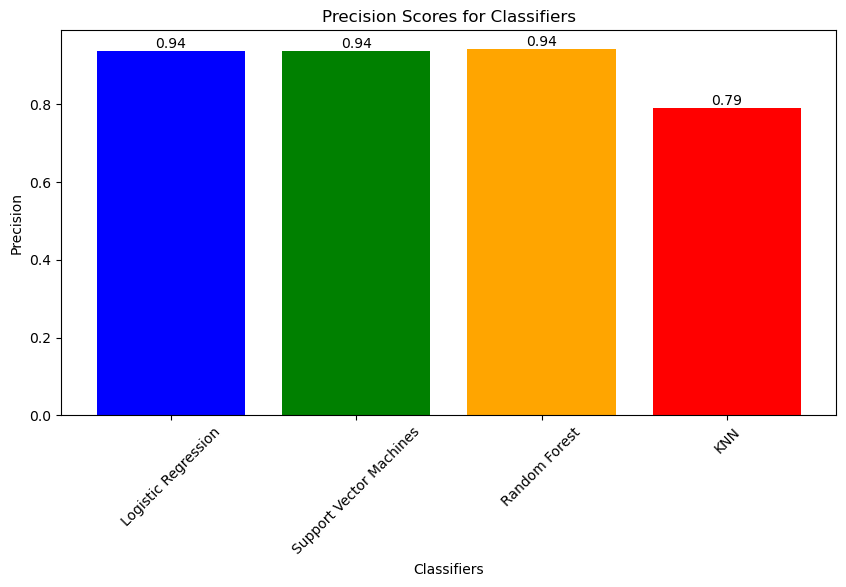

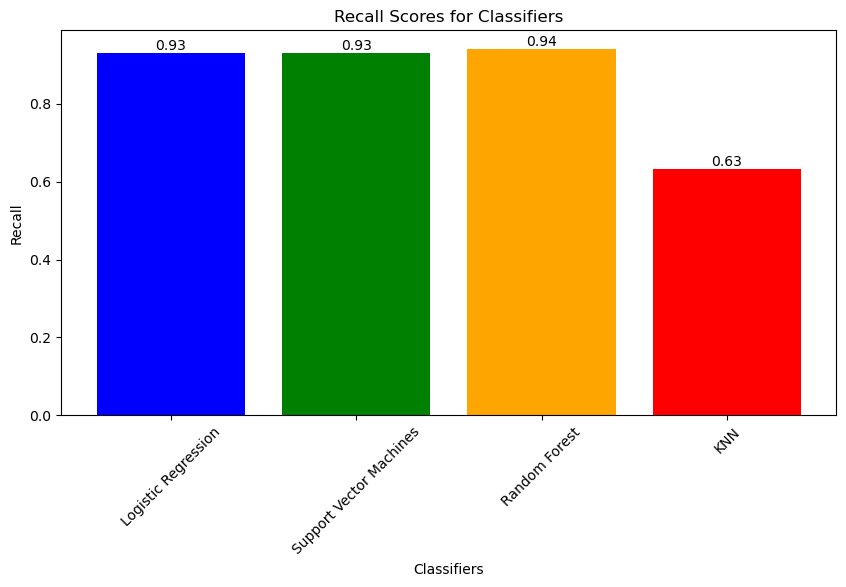

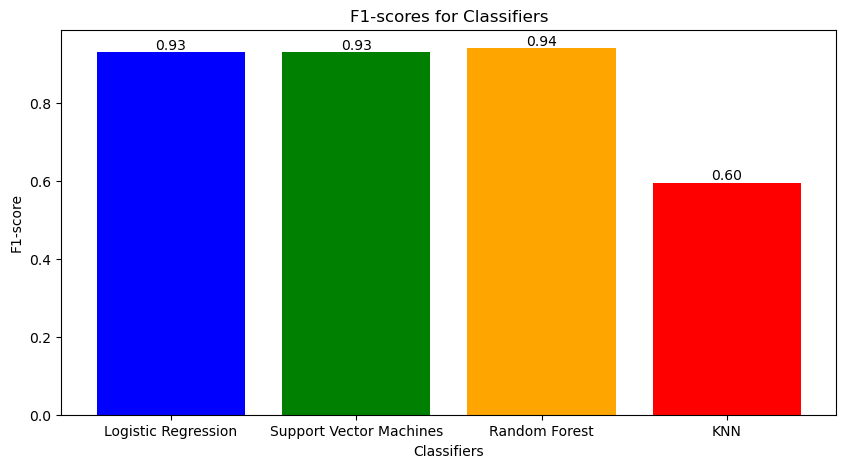

In [20]:
import matplotlib.pyplot as plt

# Create a list of classifier names
classifiers = ['Logistic Regression', 'Support Vector Machines', 'Random Forest', 'KNN']

# Create a list of precision scores
precision_scores = [precision_lr, precision_svc, precision_rf, precision_knn]

# Create a list of recall scores
recall_scores = [recall_lr, recall_svc, recall_rf, recall_knn]

# Create a list of F1-scores
f1_scores = [f1_lr, f1_svc, f1_rf, f1_knn]

# Define colors for each model
colors = ['blue', 'green', 'orange', 'red']

# Plot precision scores
plt.figure(figsize=(10, 5))
plt.bar(classifiers, precision_scores, color=colors)
plt.xlabel('Classifiers')
plt.ylabel('Precision')
plt.title('Precision Scores for Classifiers')
plt.xticks(rotation=45)

# Label each bar with its value
for i, score in enumerate(precision_scores):
    plt.text(i, score, f"{score:.2f}", ha='center', va='bottom')

plt.show()

# Plot recall scores
plt.figure(figsize=(10, 5))
plt.bar(classifiers, recall_scores, color=colors)
plt.xlabel('Classifiers')
plt.ylabel('Recall')
plt.title('Recall Scores for Classifiers')
plt.xticks(rotation=45)

# Label each bar with its value
for i, score in enumerate(recall_scores):
    plt.text(i, score, f"{score:.2f}", ha='center', va='bottom')

plt.show()

# Plot F1-scores
plt.figure(figsize=(10, 5))
plt.bar(classifiers, f1_scores, color=colors)
plt.xlabel('Classifiers')
plt.ylabel('F1-score')
plt.title('F1-scores for Classifiers')

# Label each bar with its value
for i, score in enumerate(f1_scores):
    plt.text(i, score, f"{score:.2f}", ha='center', va='bottom')

plt.savefig('F1.png')
plt.show()

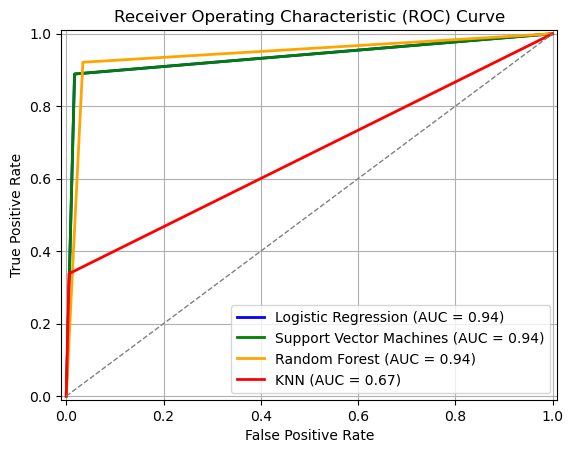

In [21]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC for Logistic Regression
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Compute ROC curve and AUC for Support Vector Machines
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, y_pred_svm)
roc_auc_svc = auc(fpr_svc, tpr_svc)

# Compute ROC curve and AUC for Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Compute ROC curve and AUC for KNN
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot ROC curve for Logistic Regression
plt.figure()
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_lr)

# Plot ROC curve for Support Vector Machines
plt.plot(fpr_svc, tpr_svc, color='green', lw=2, label='Support Vector Machines (AUC = %0.2f)' % roc_auc_svc)

# Plot ROC curve for Random Forest
plt.plot(fpr_rf, tpr_rf, color='orange', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)

# Plot ROC curve for KNN
plt.plot(fpr_knn, tpr_knn, color='red', lw=2, label='KNN (AUC = %0.2f)' % roc_auc_knn)

# Set plot properties
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)

# Show the plot
plt.savefig('roc.png')
plt.show()

In [47]:
# Neural Network
class SpamDetector(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SpamDetector, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

X_train_tensor = torch.tensor(X_train, dtype=torch.float32).clone().detach()
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).clone().detach()
X_test_tensor = torch.tensor(X_test.toarray(), dtype=torch.float32).clone().detach()  # Convert sparse matrix to dense matrix

input_size = X_train_tensor.shape[1]
hidden_size = 64
output_size = 1
learning_rate = 0.001
num_epochs = 10

model_nn = SpamDetector(input_size, hidden_size, output_size)
loss_fn = nn.BCELoss()
optimizer = optim.Adam(model_nn.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    predictions = model_nn(X_train_tensor)
    loss = loss_fn(predictions, y_train_tensor.view(-1, 1))  # Reshape y_train_tensor

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')

with torch.no_grad():
    model_nn.eval()
    y_pred_nn = model_nn(X_test_tensor)
    y_pred_nn = torch.round(y_pred_nn).numpy().astype(int)

accuracy_nn = accuracy_score(y_test, y_pred_nn)
print("Neural Network Testing Accuracy:", accuracy_nn)

Epoch 1/10, Loss: 0.6935849189758301
Epoch 2/10, Loss: 0.6916998028755188
Epoch 3/10, Loss: 0.6898218393325806
Epoch 4/10, Loss: 0.6878666877746582
Epoch 5/10, Loss: 0.6857904195785522
Epoch 6/10, Loss: 0.6835685968399048
Epoch 7/10, Loss: 0.681202232837677
Epoch 8/10, Loss: 0.6786813735961914
Epoch 9/10, Loss: 0.6760186553001404
Epoch 10/10, Loss: 0.6732141971588135
Neural Network Testing Accuracy: 0.8520408163265306


C:\Users\siyeonkim\AppData\Local\Temp\ipykernel_15632\1943057484.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train_tensor = torch.tensor(X_train, dtype=torch.float32).clone().detach()
C:\Users\siyeonkim\AppData\Local\Temp\ipykernel_15632\1943057484.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train_tensor = torch.tensor(y_train, dtype=torch.float32).clone().detach()


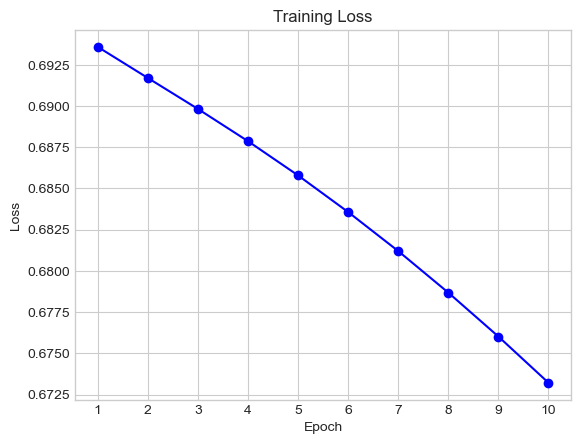

In [54]:
loss_values = [0.6935849189758301, 0.6916998028755188, 0.6898218393325806, 0.6878666877746582, 0.6857904195785522,
               0.6835685968399048, 0.681202232837677, 0.6786813735961914, 0.6760186553001404, 0.6732141971588135]

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'b-o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.xticks(epochs)
plt.savefig('epoch.png')
plt.show()

# Original Text Modelling 

In [55]:
X_o = vectorizer.fit_transform(combined_df['CONTENT'])
y_o = combined_df['CLASS']
X_o_train, X_o_test, y_o_train, y_o_test = train_test_split(X_o, y_o, test_size=0.2, random_state=42)

In [56]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model_lr = LogisticRegression()
model_lr.fit(X_o_train, y_o_train)
y_o_pred_lr = model_lr.predict(X_o_test)
accuracy_o_lr = accuracy_score(y_o_test, y_o_pred_lr)
print("LogisticRegression Testing Accuracy:", accuracy_o_lr)

#Support Vector Machines
from sklearn.svm import SVC
model_svc = SVC()
model_svc.fit(X_o_train, y_o_train)
y_o_pred_svm = model_svc.predict(X_o_test)
accuracy_o_svc = accuracy_score(y_o_test, y_o_pred_svm)
print("SVC Testing Accuracy:", accuracy_o_svc)

#Random Forest
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_o_train, y_o_train)
y_o_pred_rf = model_rf.predict(X_o_test)
accuracy_o_rf = accuracy_score(y_o_test, y_o_pred_rf)
print("RandomForest Testing Accuracy:", accuracy_o_rf)

#Knn
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
model_knn.fit(X_o_train, y_o_train)
y_o_pred_knn = model_knn.predict(X_o_test)
accuracy_o_knn = accuracy_score(y_o_test, y_o_pred_knn)
print("KNN Testing Accuracy:", accuracy_o_knn)

LogisticRegression Testing Accuracy: 0.9413265306122449
SVC Testing Accuracy: 0.9413265306122449
RandomForest Testing Accuracy: 0.9387755102040817
KNN Testing Accuracy: 0.6096938775510204
